# Training Data Evaluation


How much data is needed?
* Learning curve

What kind of data is needed?
* regression model (more complicated with multi-class)
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Confusion matrix w/ multiple training data versions

How to obtain/label more data?
* label propagation 
* polygons shared by government partners

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('../src/')
import features.create_xy as p
import hickle as hkl
import rasterio as rs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Review Label Arrays

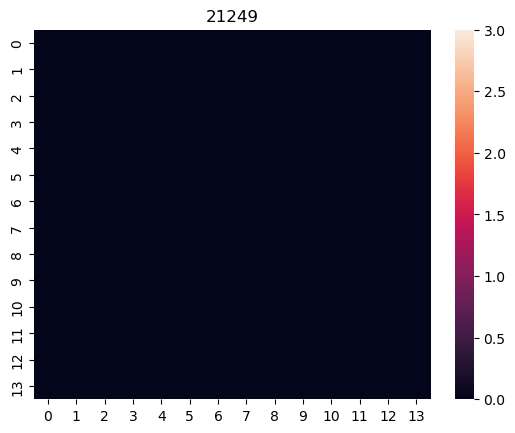

In [19]:
idx = 21249
label = np.load("../data/train-labels/" + str(idx) + ".npy")
sns.heatmap(label, vmin=0, vmax=3).set_title(str(idx));

# How much training data is needed?

## Learning Curve

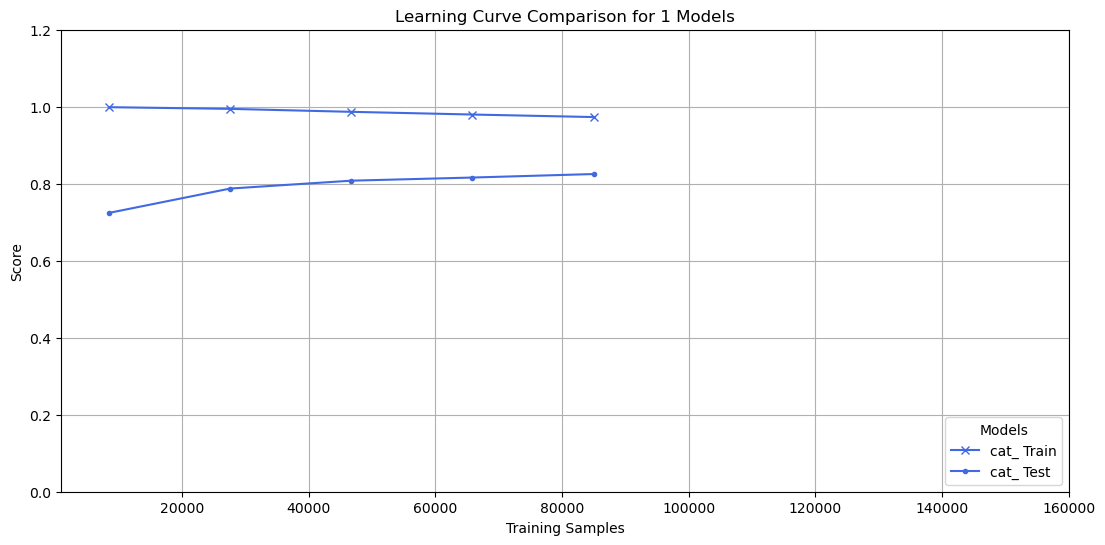

In [164]:
v20_feats = [0, 1, 5, 6, 8, 9, 11, 14, 16, 19, 20, 21, 28, 31, 33, 34, 36, 37, 39, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 60, 61, 62, 63, 64, 72, 76, 77, 78, 79, 80]
X, y = pp.create_xy(['v08','v14', 'v15', 'v18', 'v19', 'v20'], 
                    classes='multi',
                    drop_feats=False, 
                    feature_select=v20_feats,
                    verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y)
viz.learning_curve_comp(['cat_v20_tuned'], X_train_ss, y_train, 160000)

# What kind of training data is needed?

## Confusion Matrices

In [6]:
# check out results
v20_feats = [0, 1, 5, 6, 8, 9, 11, 14, 16, 19, 20, 21, 28, 31, 33, 34, 36, 37, 39, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 60, 61, 62, 63, 64, 72, 76, 77, 78, 79, 80]
X, y = pp.create_xy(['v08','v14', 'v15', 'v18', 'v19', 'v20'], 
                    classes='multi',
                    drop_feats=False, 
                    feature_select=v20_feats,
                    verbose=False)
X_train_v20, X_test_v20, y_train_v20, y_test_v20 = pp.reshape_no_scaling(X, y)
y_test, pred, probs, probs_pos = rp.fit_eval_multiclassifier(X_train_v20, 
                                                             X_test_v20, 
                                                             y_train_v20, 
                                                             y_test_v20, 
                                                             'cat',
                                                             'v20_tuned')

In [9]:
v19_ss_feats = [0, 1, 5, 6, 9, 11, 14, 16, 19, 20, 21, 28, 29, 31, 32, 34, 36, 38, 39, 43, 44, 47, 50, 51, 52, 57, 58, 59, 60, 61, 63, 64, 69, 70, 71, 72, 76, 77, 78, 80]
X, y = pp.create_xy(['v08','v14', 'v15', 'v18', 'v19'], 
                    classes='multi',
                    drop_feats=False, 
                    feature_select=v19_ss_feats,
                    verbose=False)
X_train_v19, X_test_v19, y_train_v19, y_test_v19 = pp.reshape_no_scaling(X, y)
y_test_v19, pred_v19, probs_v19, probs_pos_v19 = rp.fit_eval_multiclassifier(X_train_v19, 
                                                             X_test_v19, 
                                                             y_train_v19, 
                                                             y_test_v19, 
                                                             'cat',
                                                             'v19_tuned')

164 plots labeled "unknown" were dropped: [8015, 8019, 8023, 8035, 8044, 8049, 8066, 8081, 8085, 8092, 8097, 8103, 8104, 8115, 8116, 8127, 8136, 8140, 8144, 8148, 8157, 8161, 8162, 8163, 8166, 8167, 8172, 8178, 8180, 8184, 8185, 8196, 8200, 8201, 8205, 8207, 8209, 14004, 14015, 14018, 14029, 14030, 14044, 14046, 14063, 14066, 14076, 14077, 14087, 14092, 14113, 14118, 14119, 14120, 14127, 14129, 14133, 14134, 14135, 14139, 14141, 14144, 14149, 14151, 14152, 14153, 14154, 14155, 14158, 14159, 14163, 14170, 14171, 14172, 14177, 14186, 14187, 14189, 14191, 14207, 14210, 14212, 14214, 14220, 14222, 14224, 14230, 14232, 14235, 14238, 15010, 15046, 18058, 18080, 18082, 18101, 18104, 18105, 18106, 18107, 18108, 18111, 18114, 18115, 18116, 18118, 18122, 18125, 18126, 18127, 18129, 18130, 18139, 18141, 18142, 18144, 18151, 18153, 18162, 18164, 18171, 18177, 18178, 18179, 18180, 18182, 18183, 18184, 18186, 18188, 18189, 18190, 18191, 18192, 18193, 18194, 18195, 18196, 18197, 18198, 18200, 19085, 

100%|███████████████████████████████████████████████████████████████████████████████| 695/695 [05:41<00:00,  2.03it/s]


Class count {0.0: 56292, 1.0: 17187, 2.0: 62741}


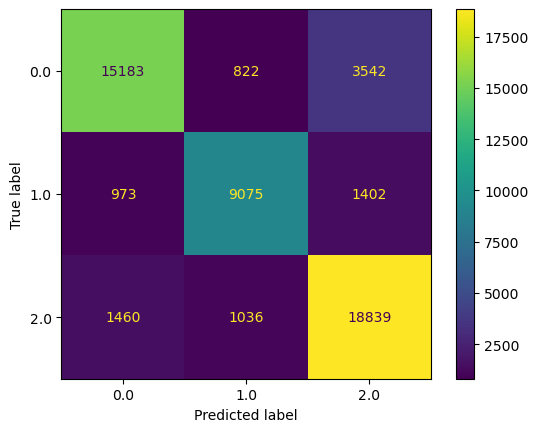

In [34]:
with open(f'../models/cat_v20_tuned.pkl', 'rb') as file:  
    model = pickle.load(file)

# Confusion Matrix
cm_v20 = confusion_matrix(y_test_v20, pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_v20, display_labels=model.classes_).plot();

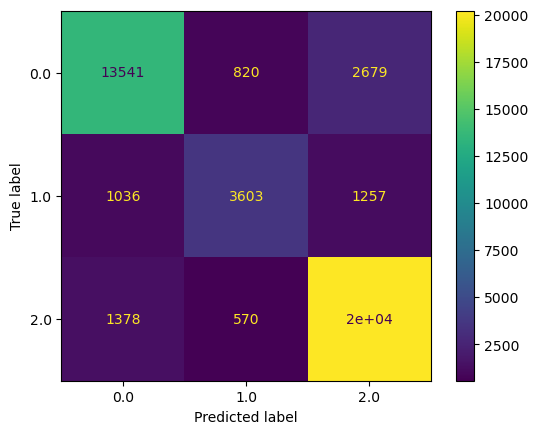

In [35]:
with open(f'../models/cat_v19_tuned.pkl', 'rb') as file:  
    model = pickle.load(file)

# Confusion Matrix
cm_v19 = confusion_matrix(y_test_v19, pred_v19, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_v19, display_labels=model.classes_).plot();

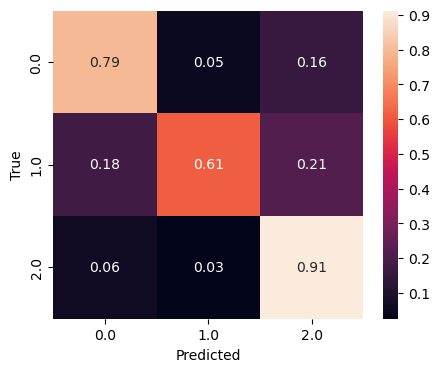

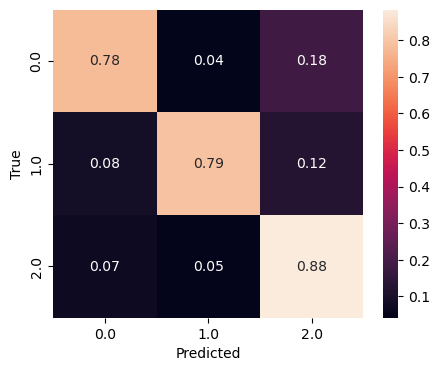

In [41]:
# Normalise and compare
cmn_v19 = cm_v19.astype('float') / cm_v19.sum(axis=1)[:, np.newaxis]
cmn_v20 = cm_v20.astype('float') / cm_v20.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(5,4))
sns.heatmap(cmn_v19, annot=True, fmt='.2f', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show(block=False)

plt.figure(figsize=(5,4))
sns.heatmap(cmn_v20, annot=True, fmt='.2f', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show(block=False)

The difference between v19 and v20 was the addition of monoculture oil palm and rubber plantation to improve the class imbalance. The breakdown is now:  
*Non-plantation %35.68, Monoculture %24.74, Agroforestry %39.56*  
With the addition of this training data, the main changes occur in the middle row. The proportion of true positives increases and the proportion of false positives decreases. The highest amount of misclassification is happening in instances where non plantation trees are classified as agroforestry.


In [1]:
def visualize_plotpreds(model_name, plot):
    
    filename = f'../models/{model_name}.pkl'
    v20_feats = [0, 1, 5, 6, 8, 9, 11, 14, 16, 19, 20, 21, 28, 31, 33, 34, 36, 37, 39, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 60, 61, 62, 63, 64, 72, 76, 77, 78, 79, 80]
    slope = pp.load_slope(plot)
    s1 = pp.load_s1(plot)
    s2 = pp.load_s2(plot)
    ttc = pp.load_ttc(plot)
    txt = pp.load_txt(plot)
    X = pp.make_sample((14, 14), slope, s1, s2, txt, ttc, v20_feats)
    y = pp.load_label(plot, classes='multi')

    with open(filename, 'rb') as file:
        model = pickle.load(file)
        
    X = np.reshape(X, (np.prod(X.shape[:-1]), X.shape[-1]))

    preds = model.predict(X)
     
    plt.figure(figsize=(17,6)) 

    plt.subplot(1,2,1)
    sns.heatmap(preds.reshape((14,14)), vmin=0, vmax=2).set_title(f'predicted: {model_name}')
    plt.subplot(1,2,2)
    sns.heatmap(y.reshape((14,14)), vmin=0, vmax=2).set_title('actual')
    
    return None

In [6]:
visualize_plotpreds('cat_v20_tuned', 20120)